# Graded exercise 1 - Harald Franck

In [1]:
import re
import csv
import cleantext as ct 
from nltk import FreqDist
import matplotlib.pyplot as plt

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


# Part 1: Regular expression warmup

In [2]:
def cen(cpr):
    pattern = re.compile("([0-3]{1}[0-9]{1})([01]{1}[0-9]{1})([0-9]{2})-?([0-9]{4})")
    match = pattern.match(cpr)
    if match:
        MM = int(match.group(2))
        YY = int(match.group(3))
        IIII = int(match.group(4))
    if IIII in range(5000,9000) and YY in range(58,100):
        return 1800
    if IIII in range(1,4000) or (IIII in range(4000,5000) and YY in range(37,100)) or (IIII in range(9000,10000) and YY in range(37,100)):
        return 1900
    elif (IIII in range(4000,5000) and YY in range(37)) or (IIII in range(5000,9000) and YY in range(58)) or (IIII in range(9000,10000) and YY in range(37)):
        return 2000
    

In [3]:
cen("180169-5555")

1800

# Part 2: Processing the FakeNewsCorpus data set

In [4]:
def readfiledict(filename):
    with open(filename, newline='') as csvfile:
            file_reader = csv.DictReader(csvfile)
            mylst = []
            for row in file_reader:
                mylst.append(row)
            return mylst
def readfile(filename):
    with open(filename, newline='') as csvfile:
        mystr = ""
        for row in csv.reader(csvfile):
            mystr += row[5]
        return mystr

In [5]:
def clean_text(dirtytext):
    dirtytext = dirtytext.lower()
    space = re.compile('[ +]')
    dirtytext = space.sub(" ", dirtytext)
    tab = re.compile(r'\t+')
    dirtytext = tab.sub('', dirtytext)
    newline = re.compile('\n+')
    dirtytext = newline.sub("", dirtytext)
    urls = re.compile(r"(((http|https):\/\/)|(\/)|(..\/))(\w+:?\w*@)?(\S+)(:\d+)?(\/|\/([\w#:.?+=&%@!\-\/]))?")
    dirtytext = urls.sub(r'<URL>', dirtytext)
    dates = re.compile('[a-zA-Z]+ ?[0-9]{1,2}, ?[0-9]{4}|(3[01]|[12][0-9]|0?[1-9])[/-](1[0-2]|0?[1-9])[/-](?:[0-9]{2})?[0-9]{2}')
    dirtytext = dates.sub(r'<DATE>', dirtytext)
    emails = re.compile(r'[\w\.-]+@[\w-]+\.+[\w]{2,4}')
    dirtytext = emails.sub(r'<EMAIL>', dirtytext)
    nums = re.compile('\d+,?\.?\d*\.?\d*|\.\d+')
    dirtytext = nums.sub(r'<NUM>', dirtytext)
    return dirtytext

In [6]:
for i in readfiledict("news_sample.csv"):
    print(clean_text(i["content"]))

sometimes the power of christmas will make you do wild and wonderful things. you do not need to believe in the holy trinity to believe in the positive power of doing good for others. the simple act of giving without receiving is lost on many of us these days, as worries about money and success hold us back from giving to others who are in need. one congregation in ohio was moved to action by the power of a sermon given at their church on christmas eve. the pastor at grand lake united methodist church in celina, ohio gave an emotional sermon about the importance of understanding the message of jesus.for many religious people the message of jesus is to help others before yourself, to make sure the people who are suffering get the help they need to enjoy life a little bit. the sermon was really about generosity and what that can look like in our lives. jesus lived a long time ago and he acted generously in the fashion of his time – but what would a generous act look like in our times? tha

the <NUM> unseen blessings of being mindful% of readers think this story is fact. add your two cents.headline: bitcoin & blockchain searches exceed trump! blockchain stocks are next!making mistakes in life is one of its inevitabilities, as it’s impossible to transcend any individual limitation without first agreeing to meet it. such encounters are the path we must walk if our wish is to fulfill whatever may be our divinely dispensed possibilities.however, the more awake we can be, the more mindful of the whole of ourselves we are before we start moving toward any aim in life, the less likely we are to find ourselves feeling stressed, angry, or fearful over where we end up.use the following twenty-one unseen blessings of being mindful to help you realize just how nice it would be to see a pit before you fall into it!<NUM> if i were mindful, i would never be in a rush…even if i had to move quickly<NUM>. if i were mindful, i couldn’t leave a mess behind me, let alone create one for someon

In [7]:
def cleantext(text):
    dates = re.compile('[a-zA-Z]+ ?[0-9]{1,2}, ?[0-9]{4}|(3[01]|[12][0-9]|0?[1-9])[/-](1[0-2]|0?[1-9])[/-](?:[0-9]{2})?[0-9]{2}')
    cleanedtext = dates.sub(r'<DATE>', text)
    cleanedtext = ct.clean(cleanedtext,
    lower=True,                    # lowercase text
    no_urls=True,                  # replace all URLs with a special token
    no_emails=True,                # replace all email addresses with a special token
    no_numbers=True,               # replace all numbers with a special token
    no_line_breaks=False,                       
    replace_with_punct="",         # instead of removing punctuations you may replace them
    replace_with_url="<URL>",
    replace_with_email="<EMAIL>",
    replace_with_number="<NUM>"
)
    
    return cleanedtext

In [8]:
for i in readfiledict("news_sample.csv"):
    print(cleantext(i["content"]))


sometimes the power of christmas will make you do wild and wonderful things. you do not need to believe in the holy trinity to believe in the positive power of doing good for others. the simple act of giving without receiving is lost on many of us these days, as worries about money and success hold us back from giving to others who are in need. one congregation in ohio was moved to action by the power of a sermon given at their church on christmas eve. the pastor at grand lake united methodist church in celina, ohio gave an emotional sermon about the importance of understanding the message of jesus.
for many religious people the message of jesus is to help others before yourself, to make sure the people who are suffering get the help they need to enjoy life a little bit. the sermon was really about generosity and what that can look like in our lives. jesus lived a long time ago and he acted generously in the fashion of his time but what would a generous act look like in our times? that

listen to the podcast audio: click here
mike gleason: it is my privilege now to welcome in greg weldon, ceo and president of weldon financial. greg has over three decades of market research and trading experience, specializing in metals and commodity markets and even authored a book in <num> titled gold trading bootcamp, where he accurately predicted the implosion of the u.s. credit market and urged people to buy gold when it was only $<num> an ounce.
he is a highly sought-after presenter at financial conferences throughout the country, and is a regular guest on financial shows throughout the world, and it's good to have him back here on the money metals podcast.
greg, thanks for joining us today. and it's nice to talk to you again. how are you?
greg weldon: i'm great, thanks. my pleasure, micheal.
mike gleason: well, when we had you on back in mid-august you were optimistic about gold at the time. we had a pretty good move higher, shortly thereafter that ended up with gold hitting a o

subscribe to canada free press for free
more than the money, our government is usurping the rights of homeowners and local officials, while causing harm to low-income families who are deprived of the real help they need to succeed
how hud makes lousy programs look great
when federal agencies promote programs, like affirmatively furthering fair housing, or common core they conduct sophisticated and often deceptive marketing campaigns that cover up there downsides. flowery slogans like, "transportation options are fundamental to having a shot at the american dream," and "economic diversity is the path to better outcomes for all american children," may sound moving. the truth about the programs is often disturbing. the department of education (used) and dot use the above phrases to market a federal scheme to regionalize and densify communities by shuffling students to new communities in the name of "income diversity." (id is the government's buzzword for a student's path to success.)
whet

small cap value report (tue <num> jan <num>) quindell, elco, lpa, boku, eye, flo, ssy
% of readers think this story is fact. add your two cents.
headline: bitcoin & blockchain searches exceed trump! blockchain stocks are next!
hi, it's paul here.
please feel free to post your comments, and small cap requests in the comments below.
quindell postscript
this announcement caught my eye. the audit firm which signed off quindell's dodgy accounts for <num>/<num> has been fined 700k + 90k costs by the financial reporting council (frc). this obscure body supposedly polices published accounts. however it rarely seems to take action, and when it does, is very slow.
the audit partner responsible, has also been reprimanded (big deal!) and fined 56k which is not a material sum of money to a partner in a decent-sized accountancy firm. also, look at the timeline it's now <num> years from those incorrect accounts being created. hardly a rapid response team!
as longer term readers here will remember, i 

trayvon martin [quick q & a]
headline: bitcoin & blockchain searches exceed trump! blockchain stocks are next!
i am a mother of four in my mid <num>\u2019s and i have been told that i have some psychic abilities, mainly psychometry, paranormal, and lately remote viewing. things come to me in the form of pictures in my mind, feelings and impressions, and sometimes sounds. i typically get them when asked to focus on specific objects or events. i clear my mind, think of the question or object and this blog is an example of what i get. this blog is a way for me to organize all my thoughts. <num>:<num> pm today i wanted to do a short response to some questions i recevied on the zimmerman case. so here they are.
q. with regards to the trayvon martin case. did it really happened the way zimmerman said it did. did trayvon threw the first punch?
a. i definitely see that trayvon was uncomfortable i also get a suspicious vibe. like martin didn't do anything yet, but it was because he felt he was 

greece is just the beginning again: "this kind of carnage can happen all over europe"
headline: bitcoin & blockchain searches exceed trump! blockchain stocks are next!
this article was originally published by michael snyder at his economic collapse blog.
editor's note: it was always just a matter of time, since the whole european fiasco was merely patched over after the last round. all the new powers given to the european banks (and all the king's horses and men) couldn't put it back together again, and couldn't stop what was inevitable under the existing conditions greece has been a ticking time bomb and things closer to disaster than ever.
everyone already knows how bad things stand to become if it plays out at its worst, so get ready. a grexit may be in the near future, a brexit is still very possible, and another round of global financial titanic could be in the works. time will tell
the next great european financial crisis has begun
the greek financial system is in the process of 

by paul fassa
allowing and encouraging domestic hemp cultivation would be a boon for small farmers, especially organic farmers. i'm talking only about industrial hemp, not medical cannabis/marijuana, which continues to prove its merits and gain acceptance.
industrial hemp's use should be a no-brainer. but it's a complex boondoggle of legal and bureaucratic nonsense even without thc, the molecule that leads to "reefer madness".
industrial hemp commercial cultivation is legal in canada. but the usa hemp industry was pushed to the side by government connected industry insiders whose monopolies were threatened when it appeared hemp may boom and compete for the very products of their monopolist concerns.
circa <num>, the hemp industry had been given a mechanical invention gift known as the decoricator machine was invented. it was a machine that was to hemp what the 19th century cotton gin was. it replaced hand shredding of hemp to glean its fibers, fibers that could be used for textiles, cl

# Part 3: Descriptive frequency analysis of the data

In [9]:
def unique(text):
    words = text.split()
    fdist1 = FreqDist(words)
    print("Analysis of unique words: " + str(fdist1))


In [10]:
unique(readfile("news_sample.csv"))

Analysis of unique words: <FreqDist with 30053 samples and 170215 outcomes>


In [11]:
unique(cleantext(readfile("news_sample.csv")))

Analysis of unique words: <FreqDist with 25507 samples and 169480 outcomes>


In [12]:
def most_common(text):
    words = text.split()
    fdist1 = FreqDist(words)
    return fdist1.most_common()

Frequency of words before cleaning:

In [13]:
most_common(readfile("news_sample.csv"))

[('the', 8244),
 ('of', 4826),
 ('to', 4722),
 ('and', 4413),
 ('a', 3141),
 ('in', 2740),
 ('is', 2193),
 ('that', 2014),
 ('for', 1402),
 ('with', 1059),
 ('on', 1055),
 ('are', 1049),
 ('The', 1025),
 ('as', 960),
 ('it', 914),
 ('you', 898),
 ('be', 877),
 ('I', 800),
 ('this', 788),
 ('was', 765),
 ('by', 765),
 ('have', 762),
 ('not', 678),
 ('from', 668),
 ('or', 644),
 ('at', 610),
 ('has', 534),
 ('your', 524),
 ('an', 502),
 ('their', 488),
 ('they', 483),
 ('will', 469),
 ('about', 420),
 ('can', 419),
 ('we', 412),
 ('more', 405),
 ('but', 391),
 ('who', 383),
 ('all', 383),
 ('–', 362),
 ('which', 361),
 ('were', 353),
 ('been', 342),
 ('his', 328),
 ('our', 327),
 ('one', 327),
 ('what', 316),
 ('he', 311),
 ('would', 311),
 ('its', 291),
 ('like', 287),
 ('people', 286),
 ('In', 281),
 ('if', 281),
 ('This', 274),
 ('do', 265),
 ('It', 264),
 ('these', 260),
 ('Blockchain', 260),
 ('had', 255),
 ('some', 251),
 ('into', 249),
 ('also', 247),
 ('no', 246),
 ('so', 241),
 

Frequency of words after reading:

In [14]:
most_common(cleantext(readfile("news_sample.csv")))

[('the', 9360),
 ('of', 4943),
 ('to', 4842),
 ('and', 4645),
 ('a', 3312),
 ('in', 3061),
 ('is', 2258),
 ('that', 2110),
 ('for', 1526),
 ('are', 1209),
 ('it', 1184),
 ('with', 1137),
 ('on', 1119),
 ('as', 1079),
 ('this', 1072),
 ('you', 1056),
 ('<num>', 1000),
 ('be', 899),
 ('by', 820),
 ('i', 803),
 ('have', 777),
 ('was', 771),
 ('not', 701),
 ('from', 698),
 ('at', 685),
 ('or', 665),
 ('they', 588),
 ('but', 574),
 ('we', 569),
 ('your', 555),
 ('has', 541),
 ('an', 517),
 ('their', 515),
 ('will', 479),
 ('all', 446),
 ('more', 445),
 ('can', 438),
 ('about', 436),
 ('if', 428),
 ('he', 411),
 ('who', 408),
 ('what', 402),
 ('one', 390),
 ('which', 375),
 ('our', 359),
 ('were', 356),
 ('his', 353),
 ('been', 342),
 ('these', 335),
 ('so', 335),
 ('there', 330),
 ('would', 320),
 ('people', 308),
 ('its', 306),
 ('like', 303),
 ('no', 298),
 ('when', 294),
 ('do', 290),
 ("it's", 281),
 ('some', 277),
 ('also', 265),
 ('had', 264),
 ('blockchain', 260),
 ('new', 255),
 ('m

In [15]:
def barplot(wordlist):
    data = wordlist[0:49]
    x_val = [x[0] for x in data]
    y_val = [x[1] for x in data]
    plt.figure(figsize=(15, 8), dpi=80)
    plt.bar(x_val, y_val)
    plt.xticks(rotation=90)
    plt.title("50 most common words")
    plt.show()


Before cleaning:

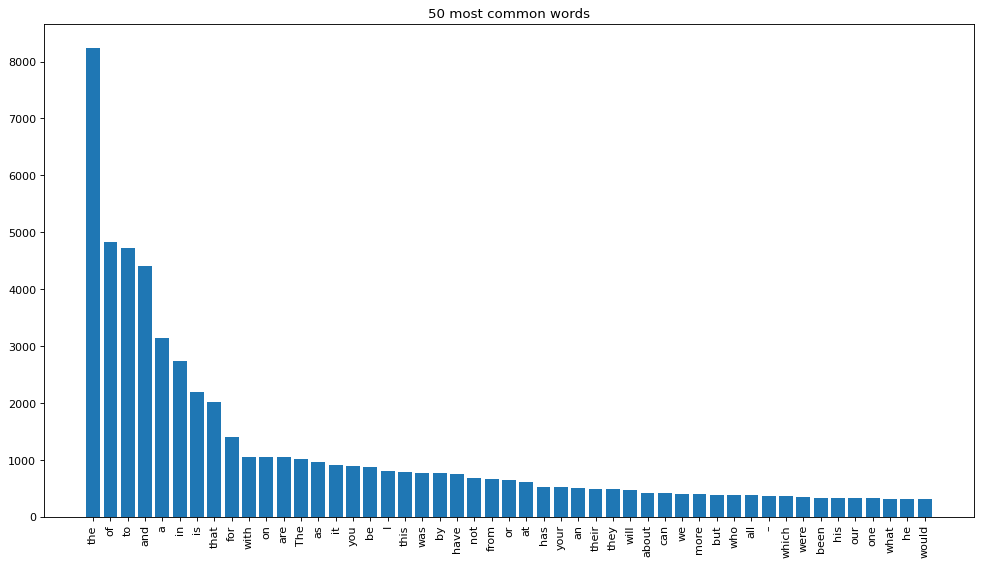

In [16]:
barplot(most_common(readfile("news_sample.csv")))

After cleaning:

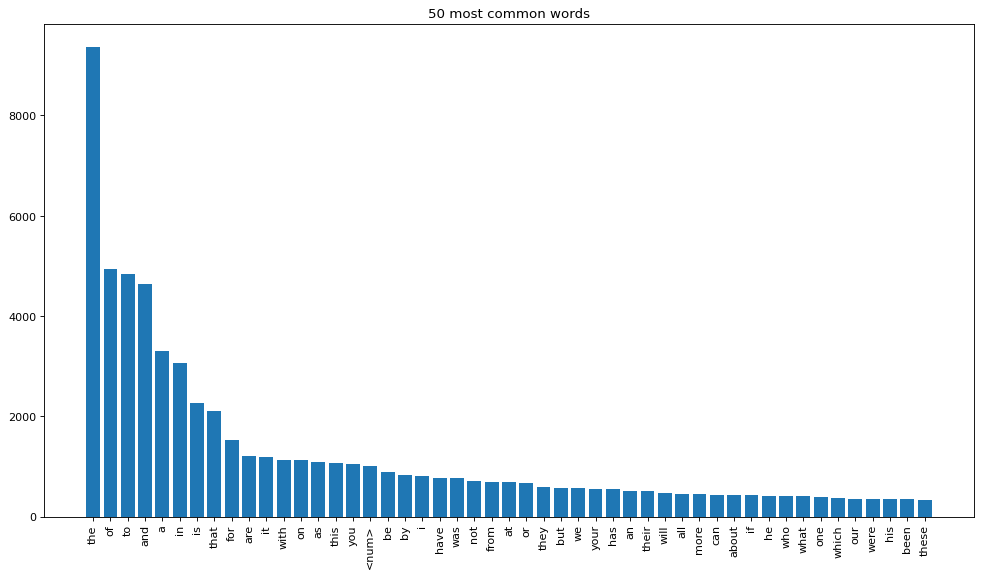

In [17]:
barplot(most_common(cleantext(readfile("news_sample.csv"))))